**<center><h3>EDA on InsaidTelecom </h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---


- Team 1009 to investigate customer data on key demographics, in order to find out about mobile and application usage by different mobile brands, mobile device properties, gender and age group of users etc.After the analysis of the data, this team would prepare a report basis which InsaidTelecom will be able to channelize and customize its product offering, so that it remains competitive in a very price sensitive market like India.



---
<a name = Section2></a>
# **2. Objective**
---

- The objective is to **perform analysis** on the demographics of the user based on usage behaviors.The Data is collected from mobile apps that use InsaidTelecom services. 

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

 - Library installation and management are handled externally, via a virtual environment managed by anaconda and the conda package installer.

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Since the library management is done externally and independent of this notebook, this isn't a concern.



<a name = Section33></a>
### **3.3 Importing Libraries**

In [38]:
import numpy as np                                                       #importing Numerical Python package
import pandas as pd                                                      #importing for Panel Data Analysis purpose
from pandas_profiling import ProfileReport                               #importing pandas profiling to generate univariate analysis              
import mysql.connector as sql                                            #importing package for connecting to mysql database
import matplotlib.pyplot as plt                                          #pyplot interface of matplotlib
import seaborn as sns                                                    #seaborn library for interactive visualization
from geopy.geocoders import Nominatim as nm                              #geopy package for resolving location from coordinates and vice-versa                             
import folium as fm                                                      #importing folium for visualizing geospatial data
from folium.plugins import MarkerCluster                                 #importing to display markers on map
from tqdm.notebook import tqdm

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = (22,22)
rcParams['figure.dpi'] = 150


%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

### **Events Dataset**
</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 3252950 | 7 | 173.7+ MB | 

</br>

event_id - ID of event logged when device id used by user<br>
device_id - Device ID<br>
timestamp -Time of logged event<br>
longitude - longitude of location where event got logged<br>
latitude - latitude of location where event got logged<br>
city - City corresponding to logged event <br>
state - State corresponding to logged event<br>

### **Gender_Age_Train Dataset**

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 74645 | 4 | 2.3+ MB | 

</br>

device_id - Device ID<br>
gender - Gender of user<br>
age - Age of user<br>
group - Age group of user<br>


### **Phone Brand Device Model Dataset**

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 87726 | 3 | 2.0+ MB | 

</br>

device_id - Device ID<br>
phone_brand - Phone Brand<br>
device_model - Device Model<br><br> 
##In this table, few brands are in Chinese/non-English charaters so we need to convert same to english.<br>
<br>
Brand Name	 Brand English Mapping<br>
'华为' - 	   'Huawei'<br>
'小米' - 	   'Xiaomi'<br>
'三星' - 	   'Samsung'<br>
'vivo' - 	 'vivo'<br>
'OPPO' - 	     'OPPO'<br>
'魅族' - 	   'Meizu'<br>
'酷派' - 	   'Coolpad'<br>
'乐视' - 	   'LeEco'<br>
'联想' - 	   'Lenovo'<br>
'HTC' - 	     'HTC'<br>
'天语' -        'Tianyu'<br>


In [2]:
#IMPORTING ALL THREE DATA FRAMES 
#Events dataset
df1 = pd.read_csv('events_data.csv')
server = sql.connect(host='cpanel.insaid.co', database='Capstone1', user='student', password='student')
#gender_age_train dataset
df2 = pd.read_sql('SELECT * FROM gender_age_train', con=server)
#phone_brand_device_model dataset
df3 = pd.read_sql('SELECT * FROM phone_brand_device_model', con=server)
server.close

#ADDITIONAL REQUIRED INFO
eng_names = dict([['华为','Huawei'],
                  ['小米','Xiaomi'],
                  ['三星','Samsung'],
                  ['vivo','vivo'],
                  ['OPPO','OPPO'],
                  ['魅族','Meizu'],
                  ['酷派','Coolpad'],
                  ['乐视','LeEco'],
                  ['联想','Lenovo'],
                  ['HTC','HTC'],
                  ['天语','Tianyu']])

In [3]:
print('Events Data Shape:', df1.shape)
df1.info()
df1.head()

Events Data Shape: (3252950, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [4]:
print('gender_age_train Shape:', df2.shape)
df2.info()
df2.head()

gender_age_train Shape: (74645, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [5]:
print('phone_brand_device_model Shape:', df3.shape)
df3.info()
df3.head()

phone_brand_device_model Shape: (87726, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about 3 datasets.

In [6]:
print("Events Data:"+'\n',df1.describe())

Events Data:
            event_id     device_id     longitude      latitude
count  3.252950e+06  3.252497e+06  3.252527e+06  3.252527e+06
mean   1.626476e+06  1.012200e+17  7.815868e+01  2.168851e+01
std    9.390459e+05  5.316758e+18  4.235570e+00  5.789111e+00
min    1.000000e+00 -9.222957e+18  1.256700e+01  8.190110e+00
25%    8.132382e+05 -4.540611e+18  7.583543e+01  1.780171e+01
50%    1.626476e+06  1.726820e+17  7.726814e+01  2.216454e+01
75%    2.439713e+06  4.861813e+18  8.031916e+01  2.868278e+01
max    3.252950e+06  9.222849e+18  9.545946e+01  4.187190e+01


In [7]:
print("gender_age_train:"+'\n',df2.describe())

gender_age_train:
           device_id           age
count  7.464500e+04  74645.000000
mean  -7.491354e+14     31.410342
std    5.327150e+18      9.868735
min   -9.223067e+18      1.000000
25%   -4.617367e+18     25.000000
50%   -1.841362e+16     29.000000
75%    4.636656e+18     36.000000
max    9.222849e+18     96.000000


In [8]:
print("phone_brand_device_model:"+'\n',df3.describe())

phone_brand_device_model:
           device_id
count  8.772600e+04
mean  -5.212557e+15
std    5.330157e+18
min   -9.223322e+18
25%   -4.623331e+18
50%   -3.109802e+16
75%    4.635194e+18
max    9.222849e+18


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [9]:
print("Events Data:"+'\n',df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB
Events Data:
 None


In [10]:
print("gender_age_train:"+'\n',df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
gender_age_train:
 None


In [11]:
print("phone_brand_device_model:"+'\n',df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
phone_brand_device_model:
 None


**Observations**:

- There are no missing / null values in the sql retrieved datasets but there are null values in the events dataset. 		
		
		
- Null values are present in the form of device_id (453), longitude (423), latitude (423) and state (377) in the   events_data.csv file		
		
		
- device_id is present in 3 datasets so we can use this variable to merge all three to come up with one		
		
		
- phone_brand and device_model columns need translation of names of chinese with english		
		
		
- In the gender_age_train_dataset, the age ranges from 1 to 90 years and there are 6 unique groups for both females and males which range from F23 TO F43+ for females and M22 to M39+ for males.		
		
		

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- For a quick analysis, we will generate a HTML using pandas profiling.

In [12]:
profile = ProfileReport(df=df1)
profile.to_notebook_iframe()
print('Accomplished!')

In [15]:
profile = ProfileReport(df=df2)
profile.to_notebook_iframe()
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [16]:
profile = ProfileReport(df=df3)
profile.to_notebook_iframe()
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:


 ***Events Data***:
- Null values are present in the form of device_id (453), longitude (423), latitude (423) and state (377) in the events_data.csv file<br><br>
 ***Gender_Age_Train***:
- No missing cells and no duplicate rows
- The age ranges from 1 to 90 years and there are 6 unique groups for both females and males which range from F23 TO F43+ for females and M22 to M39+ for males.<br><br>
 ***phone_brand_device_model***:

- No missing cells and no duplicate rows
- There are 116 phone brands spread across 1467 device models.
- Maximum devices corresponds to **Xiaomi**


---
<a name = Section6></a>
# **6. Data Cleaning**
---

- Our objective is to do analysis for **Maharashtra** state. We need to fill missing latitudes, longitudes and state so for that we will do some analysis.

---
**<h4>Step 1:** For **Maharashtra**, we will check few points here <br> 1.Whether longitude and latitude are always missing in pairs <br> 2.Whether each city only exists in one state.<br> 3.Whether we can use coordinates to find the state </h4>

---

In [12]:
# Some output formatting assistance
def line_break():
    print('-------------------------------------------------------------------------------------')



# Check 1 - Whether longitude and latitude are always missing in pairs:
# This code creates two dataframes, containing the index values (row numbers) of the rows where either one is missing, and then checks if the two dataframes are identical.
# If they are identical, then they are always missing in pairs.
Check1 = df1[df1['latitude'].isnull()].index.equals(df1['longitude'].isnull().index)
print("Check 1 - Latitude and Longitude are always missing in pairs - " + str(Check1))

line_break()

# Check 2 - Whether each city only exists in one state
# This code creates a dataframe containing unique city-state pairs, and the length of this dataframe is compared to the number of unique cities.
# If they are of different length, then we cannot calculate the state using the city
city_state_pairs = df1[df1['state'].notnull()][['city','state']].drop_duplicates()
unique_cities = df1['city'].nunique()
print('Check 2 - There are ' + str(len(city_state_pairs)) + ' unique city-state pairs, and ' + str(unique_cities) + ' unique cities')
#These two numbers are not equal. This means that some cities are present in multiple states. To verify:
city_state_pairs['city'].value_counts()[0:11]

line_break()

# Check 3 - Whether we can use coordinates to find the state
Check3a = df1[df1['latitude'].isnull()].index.tolist()
Check3b = df1[df1['state'].isnull()].index.tolist()
for i in Check3a:
    if i in Check3b:
        print('Check 3 - In row ' + str(i) + ', both the coordinates and the city are missing')
# This prints nothing; therefore, we can use coordinates to find the city.
# This is foolproof, as each coordinate pair MUST refer to only one state

line_break()

# Check 4 - Keep track of number of unique entries in "state"
# After adding the states using geopy, if the syntax is wrong, then this will help detect that:
print('Check 4 - There are ' + str(df1['state'].nunique()) + ' unique entries in the "state" column.')


Check 1 - Latitude and Longitude are always missing in pairs - False
-------------------------------------------------------------------------------------
Check 2 - There are 943 unique city-state pairs, and 933 unique cities
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Check 4 - There are 32 unique entries in the "state" column.


In [13]:
# This is a list containing the index values of all rows where state is a null value.
null_records = df1[df1['state'].isnull()].index.tolist()
# This section of code fills in those values via geopy and a loop over the rows with null values
geolocator = nm(user_agent="my-applications")
for i in null_records:
    location = geolocator.reverse([df1.at[i,'latitude'],df1.at[i,'longitude']])
    # the code for location is taken from https://www.geeksforgeeks.org/python-remove-spaces-from-a-string/
    df1.at[i,'state'] = location.raw['address'].get('state', '').replace(' ','')

print(df1['state'].nunique())

## THIS DOES THE FILTERING FOR MAHARASHTRA
df1 = df1[df1['state'] == "Maharashtra"]

32


In [14]:
# Studying the null values in the coordinates. 
# This dataframe contains only the rows with null values in the coordinates
t1 = df1[df1['longitude'].isnull()]
print(t1.info())
line_break()
# This shows the device_ids present in the records with missing coordinates. 
# For MHA, there are 3 missing ids with 21 missing coordinates each. For all-India, there are 21 missing ids with 14-22 missing coordinates each.
print(t1['device_id'].value_counts())
# This stores the unique device_ids, so we can study them across the whole database.
bad_coords_id = t1['device_id'].value_counts().index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 20586 to 3240304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   63 non-null     int64  
 1   device_id  63 non-null     float64
 2   timestamp  63 non-null     object 
 3   longitude  0 non-null      float64
 4   latitude   0 non-null      float64
 5   city       63 non-null     object 
 6   state      63 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.9+ KB
None
-------------------------------------------------------------------------------------
-7.364841e+18    21
 7.018600e+18    21
 5.115185e+18    21
Name: device_id, dtype: int64


In [15]:
# These count the number of unique coordinate pairs that the device_ids have across the whole database
# Note that each of the device_ids has one unique coordinate pair associated with it across ALL records. This means that the device was used from the same location all the time
# There are multiple hundred rows for each device_id with the coordinates present, so we can safely substitute the missing values with the device_id's coordinates.
for i in range(0,len(bad_coords_id)):
    print(df1[df1['device_id'] == bad_coords_id[i]][['latitude','longitude']].value_counts())
    print(df1[df1['device_id'] == bad_coords_id[i]][['latitude','longitude']].info())
    line_break()

latitude  longitude
18.54074  73.931944    2604
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2625 entries, 1678 to 3251982
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   2604 non-null   float64
 1   longitude  2604 non-null   float64
dtypes: float64(2)
memory usage: 61.5 KB
None
-------------------------------------------------------------------------------------
latitude   longitude
18.575747  73.926223    1894
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 822 to 3252657
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1894 non-null   float64
 1   longitude  1894 non-null   float64
dtypes: float64(2)
memory usage: 44.9 KB
None
-------------------------------------------------------------------------------------
latitude   longitude
18.556741  73.88868     1864
dtype: int64
<class

In [16]:
# Doing the substitution here
for i in range(0,len(bad_coords_id)):
    values = {}
    replacement = df1[df1['device_id'] == bad_coords_id[i]][['latitude','longitude']].value_counts().index[0]
    values['latitude'] = replacement[0]
    values['longitude'] = replacement[1]
    df1[df1['device_id'] == bad_coords_id[i]] = df1.fillna(value = values)
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677168 entries, 9 to 3252946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   677168 non-null  int64  
 1   device_id  677096 non-null  float64
 2   timestamp  677168 non-null  object 
 3   longitude  677168 non-null  float64
 4   latitude   677168 non-null  float64
 5   city       677168 non-null  object 
 6   state      677168 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 57.5+ MB


In [17]:
# This takes out the 9 points outside of Maharashtra, based on folium visualization (removed that code, as it takes AGES). 
# The most eastern point of the 9 was in Kabul at ~69 longitude, so a cutoff of 72 is used here.

df1 = df1[df1['longitude'] > 72]
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677159 entries, 9 to 3252946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   677159 non-null  int64  
 1   device_id  677087 non-null  float64
 2   timestamp  677159 non-null  object 
 3   longitude  677159 non-null  float64
 4   latitude   677159 non-null  float64
 5   city       677159 non-null  object 
 6   state      677159 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 41.3+ MB


In [18]:
# Check 5 - Whether each device_id has got a unique corresponding coordinate.
# Same number of coordinate entires after dropping duplicates even if we include device_id
# This means that the above check is True
print(df1.info(show_counts = True))
print(df1[['device_id','longitude','latitude']].drop_duplicates().info())
print(df1[['device_id']].drop_duplicates().info())
print(df1[['longitude','latitude']].drop_duplicates().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677159 entries, 9 to 3252946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   677159 non-null  int64  
 1   device_id  677087 non-null  float64
 2   timestamp  677159 non-null  object 
 3   longitude  677159 non-null  float64
 4   latitude   677159 non-null  float64
 5   city       677159 non-null  object 
 6   state      677159 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 41.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9013 entries, 9 to 3252798
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  9010 non-null   float64
 1   longitude  9013 non-null   float64
 2   latitude   9013 non-null   float64
dtypes: float64(3)
memory usage: 281.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9011 entries, 9 to 3252798
Data columns (total

In [19]:
# Studying the null values in the device_ids. Yes, this is literally a duplicate of what was done for the coordinates.
# This dataframe contains only the rows with null values in device_id
t2 = df1[df1['device_id'].isnull()]
print(t2.info())
line_break()
# This shows the coordinate pairs that are present with missing device_ids. 
# Note that there are only 3 unique pairs, with 24 missing device_ids each.
print(t2[['longitude','latitude']].value_counts())
# This stores the 3 unique coordinate, so we can study them across the whole database.
bad_device_id = t2[['longitude','latitude']].value_counts().index

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 45052 to 3135318
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   72 non-null     int64  
 1   device_id  0 non-null      float64
 2   timestamp  72 non-null     object 
 3   longitude  72 non-null     float64
 4   latitude   72 non-null     float64
 5   city       72 non-null     object 
 6   state      72 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.5+ KB
None
-------------------------------------------------------------------------------------
longitude  latitude 
73.860165  18.566925    24
73.862756  18.628057    24
73.926499  18.614812    24
dtype: int64


In [20]:
# These take the three aforementioned coordinate pairs and counts the device_id for each pair in the full database
# Note that for each pair, only one device_id turns up
# This means that for the 24 records missing device_ids, we can assume that the same device_id is used as for the hundreds of records at that coordinate which have device_id present.
print(df1.loc[(df1['longitude'] == bad_device_id[0][0]) & (df1['latitude'] == bad_device_id[0][1])]['device_id'].value_counts())
line_break()
print(df1.loc[(df1['longitude'] == bad_device_id[1][0]) & (df1['latitude'] == bad_device_id[1][1])][['device_id']].value_counts())
line_break()
print(df1.loc[(df1['longitude'] == bad_device_id[2][0]) & (df1['latitude'] == bad_device_id[2][1])][['device_id']].value_counts())

8.539871e+18    1793
Name: device_id, dtype: int64
-------------------------------------------------------------------------------------
device_id   
9.027086e+18    1767
dtype: int64
-------------------------------------------------------------------------------------
device_id   
1.771586e+17    1698
dtype: int64


In [21]:
# Doing the substitution here
for i in range(0,3):
    replacement = df1.loc[(df1['longitude'] == bad_device_id[i][0]) & (df1['latitude'] == bad_device_id[i][1])]['device_id'].value_counts().index[0]
    (df1.loc[(df1['longitude'] == bad_device_id[i][0]) & (df1['latitude'] == bad_device_id[i][1])]) = df1.fillna(value = replacement)
df1.info(show_counts=True)
# This converts the device_id to int.
df1['device_id'] = df1['device_id'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677159 entries, 9 to 3252946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   677159 non-null  int64  
 1   device_id  677159 non-null  float64
 2   timestamp  677159 non-null  object 
 3   longitude  677159 non-null  float64
 4   latitude   677159 non-null  float64
 5   city       677159 non-null  object 
 6   state      677159 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 57.5+ MB


In [22]:
dft = pd.merge(left=df1,right=df2,how='left',on='device_id')
dfm = pd.merge(left=dft,right=df3,how='left',on='device_id')

In [23]:
df2['group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [24]:
# Creating better groups
dfm['new_group'] = np.nan

def round_age(val, base = 2):
    return (base * np.floor(val/base)).astype(int)


update_dataframe = dfm[dfm['group'].notnull()][['gender','age','new_group']]
update_dataframe['new_group'] = (round_age(update_dataframe['age']).astype(str) + 
                                 '-' + 
                                 (round_age(update_dataframe['age'])+2).astype(str))
# update_dataframe['gender'].astype(str) - use this if you want the gender letter too
dfm.update(update_dataframe)

In [25]:
dfm.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677159 entries, 0 to 677158
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      677159 non-null  int64  
 1   device_id     677159 non-null  int64  
 2   timestamp     677159 non-null  object 
 3   longitude     677159 non-null  float64
 4   latitude      677159 non-null  float64
 5   city          677159 non-null  object 
 6   state         677159 non-null  object 
 7   gender        3177 non-null    object 
 8   age           3177 non-null    float64
 9   group         3177 non-null    object 
 10  phone_brand   3177 non-null    object 
 11  device_model  3177 non-null    object 
 12  new_group     3177 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 72.3+ MB


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

In [28]:
profile_1 = ProfileReport(df=dfm)
profile_1.to_notebook_iframe()
print('Accomplished!')

TypeError: concat() got an unexpected keyword argument 'join_axes'

**Observations**:

- The data is specific to **Maharashtra**.
- We can begin our **EDA** now.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

---
**<h4>EDA 1:**  Distribution of Users(device_id) across cities in Maharashtra state.</h4>

---

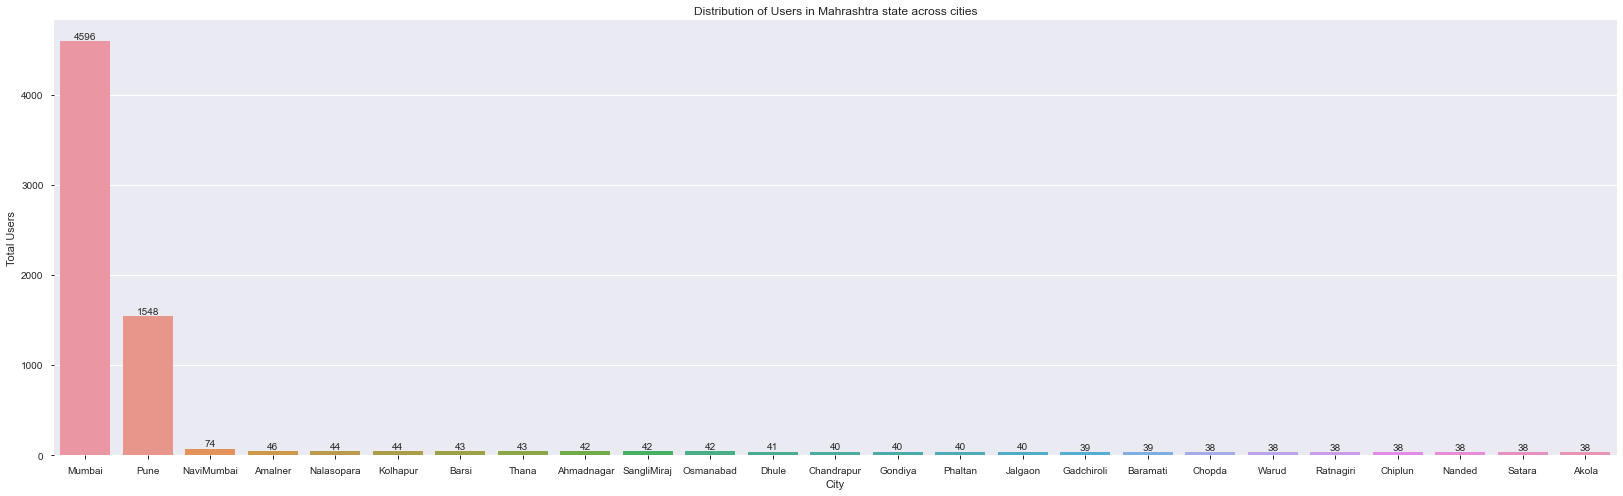

In [26]:
%matplotlib inline
# Assessing Q1 from Week 3
# Drops duplicates based on device_id only, and then slices only the latitude and longitude from the remainder.
dfq1 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['latitude','longitude','city']]

# Folium map
q1_map = fm.Map(location = [19,72],tiles = 'cartodbpositron')
# List of location coordinates
locations = list(zip(dfq1['latitude'].tolist(),dfq1['longitude'].tolist()))
# Creating a marker cluster
marker_cluster = MarkerCluster(locations)
# Adding it to the map
marker_cluster.add_to(q1_map)
# Saving the map
q1_map.save('Question_1.html')

# This plots a bar graph of the top 25 cities in Maharashtra in terms of users.
plt.figure(figsize=(28,8))
q1_fig1 = sns.countplot(x='city',data=dfq1,order = dfq1["city"].value_counts().iloc[0:25].index)
plt.title('Distribution of Users in Mahrashtra state across cities')
plt.ylabel('Total Users')
plt.xlabel('City')
plt.bar_label(q1_fig1.containers[0])
plt.show()

# There are MANY cities with users in the low double digits just like the ones towards the right of the graph.
# pd.set_option('display.max_rows', 500)
# print(dfq1['city'].value_counts())


**Observations**:
Total unique Device Ids in Maharastra state is 9010.
Mumbai City holds more than 50% users while Pune has 17%. Most of the users are concentrated to the western Maharashtra.
Rest of the 33% users are distributed across other 85 cities.

---
**<h4>EDA 2:**Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).</h4>

---

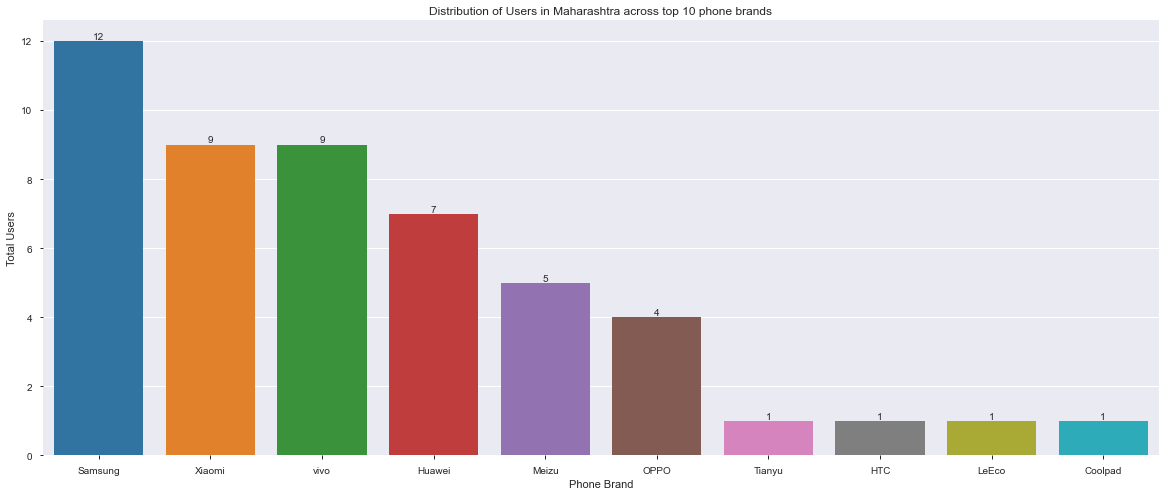

In [27]:
# Assessing Q2 from Week 3
# Creates a smaller dataframe with only rows pertaining to the 10 most common phone_brands.
dfq2 = dfm[dfm['phone_brand'].isin(dfm['phone_brand'].value_counts().index[0:10])].drop_duplicates(subset = 'device_id', keep = 'first')[['device_id','phone_brand']]
dfq2['phone_brand'] = dfq2['phone_brand'].map(eng_names)
plt.figure(figsize=(20,8))
q2_fig1 = sns.countplot(x='phone_brand',data=dfq2,order = dfq2["phone_brand"].value_counts().iloc[0:10].index)
plt.title('Distribution of Users in Maharashtra across top 10 phone brands')
plt.ylabel('Total Users')
plt.xlabel('Phone Brand')
plt.bar_label(q2_fig1.containers[0])
plt.show()


**Observations**:

- Total users(for whom we have device information) are 53 in Maharashtra state. Out of list of brands available, 6 of these have atleast 2 users or more. Samsung,Xiaomi,Vivo tops the list with 12, 9 and 9 users respectively.


---
**<h4>EDA 3:** Distribution of Users across Gender.</h4>

---


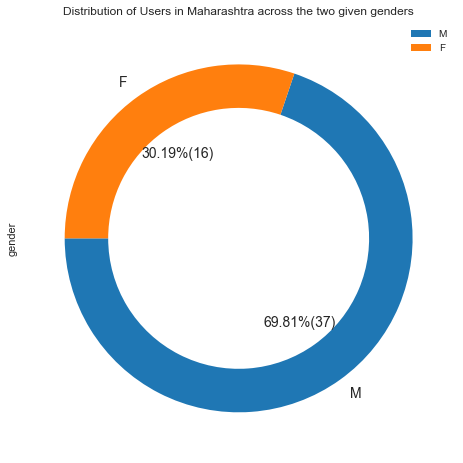

In [28]:
# Assessing Q3 from Week 3
dfq3 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['gender']]

groups = dfq3.groupby('gender').size()
plt.figure(figsize=(10,10))
q3_fig1 = dfq3['gender'].value_counts().plot(kind='pie',fontsize=14,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*groups.sum()), figsize=[8,8],
                                       startangle = 180,wedgeprops=dict(width=0.25),legend = True)
plt.title('Distribution of Users in Maharashtra across the two given genders')
plt.show()

**Observations**:
Total users(for whom we have device information) are 53 in Maharashtra state. Out of these, 37 are Males and 16 are females. Thus the distribution ratio is 7:3.

---
**<h4>EDA 4:** Distribution of Users across Age Segments.</h4>

---


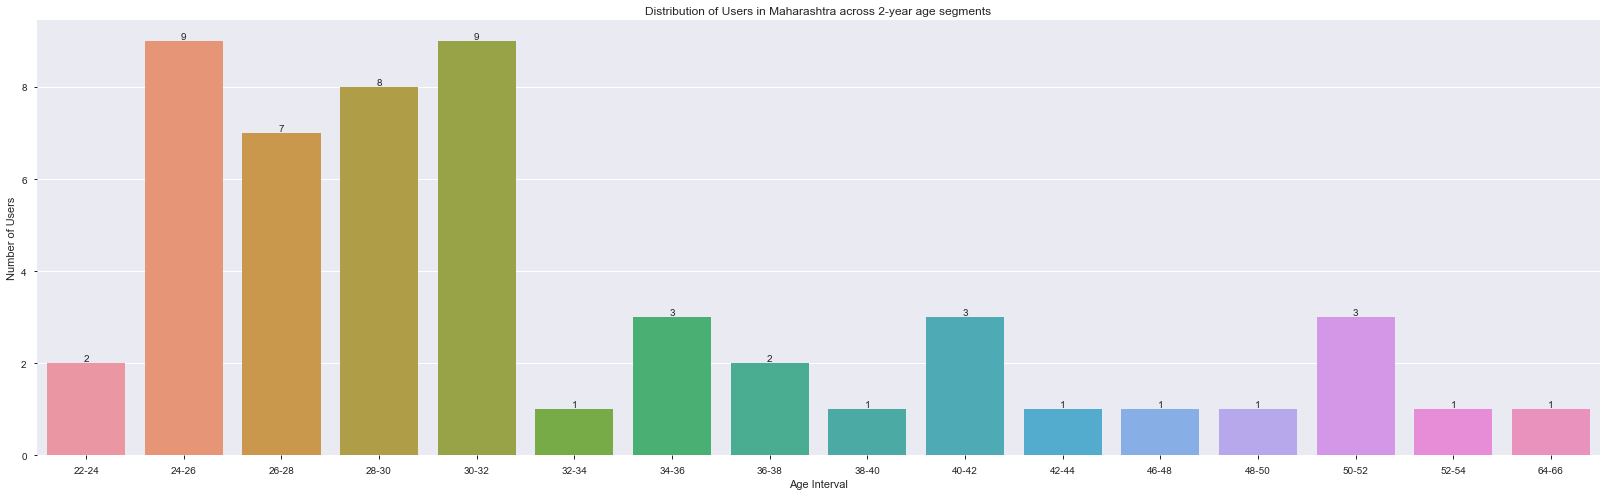

In [29]:
# Assessing Q4 from Week 3
dfq4 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['device_id','new_group']]
plt.figure(figsize=(28,8))
q4_fig1 = sns.countplot(x='new_group',data=dfq4, order = sorted(dfq4['new_group'].value_counts().index.tolist()))
q4_fig1.bar_label(q4_fig1.containers[0])
plt.ylabel('Number of Users')
plt.xlabel('Age Interval')
plt.title('Distribution of Users in Maharashtra across 2-year age segments')
plt.show()


**Observations**:

For Maharashtra, only 53 users are using devices.
As per the original grouping, M29-31 holds the highest percentage of 8
males while in female F29-32 and F24 - 26 has most females with count 4.


We modified the intervals and created a new grouping which has intervals of two years and these intervals are identical for Males and Females.

Analysis: The largest age group of users ranges in 24-32 (having 33/53) users.


---
**<h4>Question 5:** Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender</h4>


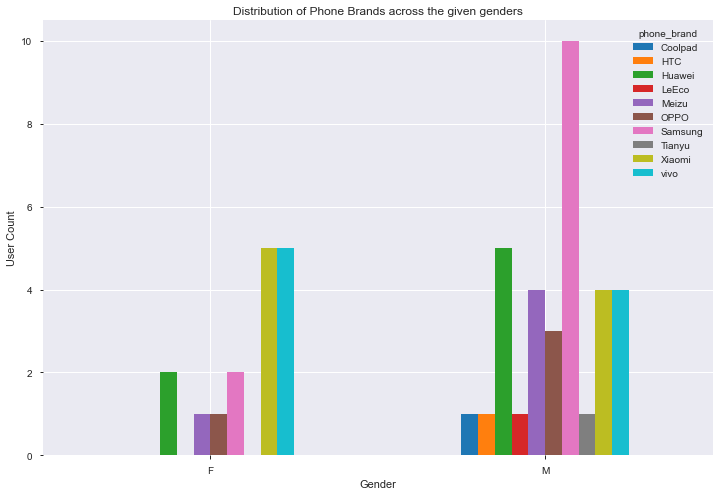

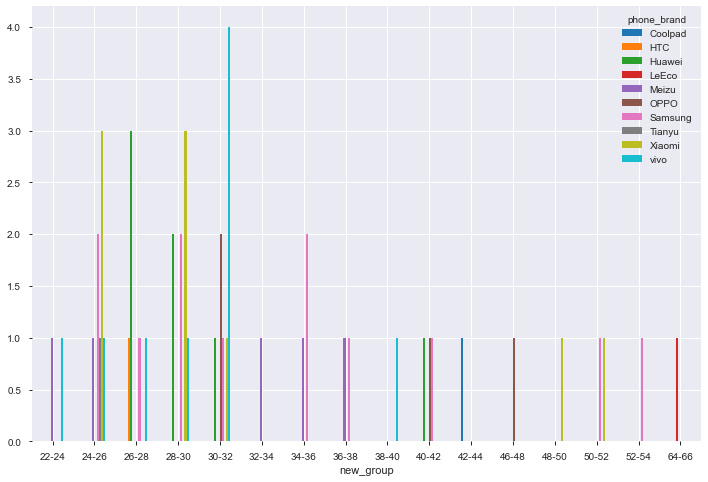

In [46]:
# Assessing Q5 from Week 3
dfq5 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['gender','phone_brand','group','new_group']]
dfq5=dfq5[dfq5['gender'].notnull()]
dfq5['phone_brand'] = dfq5['phone_brand'].map(eng_names)

q5_cross1 = pd.crosstab(dfq5['gender'],dfq5['phone_brand'])
q5_fig1 = q5_cross1.plot.bar(rot=0,figsize=(12,8))
#q5_fig1.bar_label(q5_fig1.containers[0])
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.title('Distribution of Phone Brands across the given genders')
plt.show()

# There are so few users and so many age segments (both the given segments as well as the ones we made) 
# that no meaningful analysis can be made when creating a matrix of age segments and phone brands.
q5_cross2 = pd.crosstab(dfq5['new_group'],dfq5['phone_brand'])
#q5_cross2
q5_fig2 = q5_cross2.plot.bar(rot=0,figsize=(12,8))

**Observations**:

As the data is very less, so the scope of analysis is very limited. 
For Males, Samsung is the most popular (10 males).It is twice popular as the second on Huawei.
For Females, Xiaomi and Vivo(with 5 each) are the most popular.

For Age Segment, the data is too less for such granular analysis.

---
**<h4>Question 6:** Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)<br></h4>

---


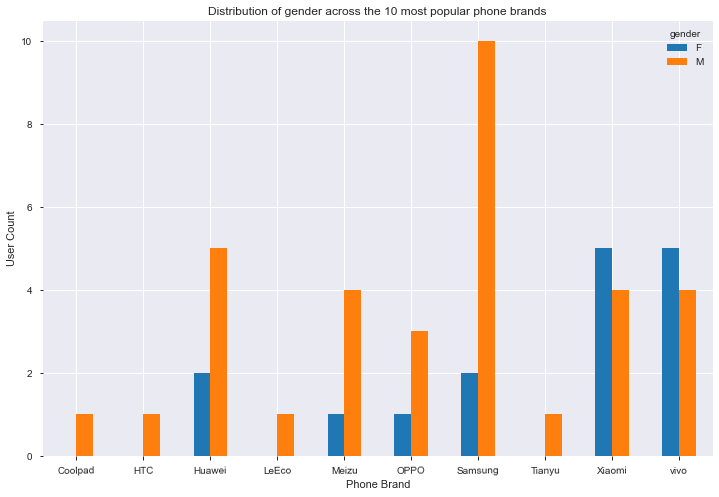

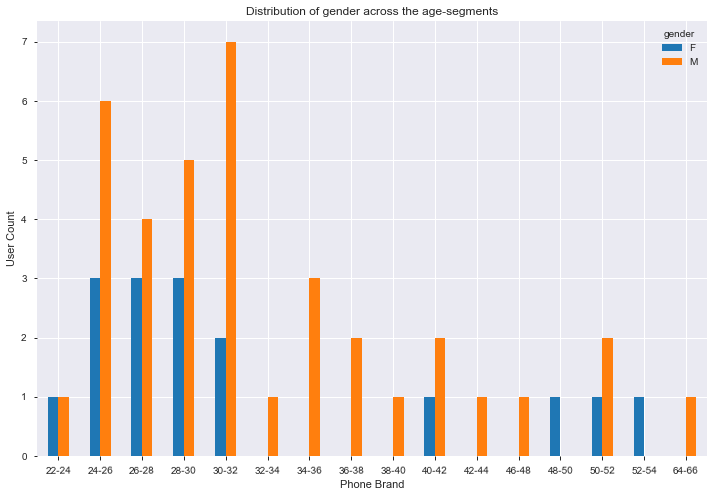

In [47]:
# Assessing Q6 from Week 3
dfq6 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['gender','phone_brand','group','new_group']]
dfq6=dfq6[dfq6['gender'].notnull()]
dfq6['phone_brand'] = dfq6['phone_brand'].map(eng_names)

q6_cross1 = pd.crosstab(dfq6['phone_brand'],dfq6['gender'])
q6_fig1 = q6_cross1.plot.bar(rot=1,figsize=(12,8))
plt.xlabel('Phone Brand')
plt.ylabel('User Count')
plt.title('Distribution of gender across the 10 most popular phone brands')
plt.show()


q6_cross2 = pd.crosstab(dfq6['new_group'],dfq5['gender'])
q6_fig2 = q6_cross2.plot.bar(rot=1,figsize=(12,8))
plt.xlabel('Phone Brand')
plt.ylabel('User Count')
plt.title('Distribution of gender across the age-segments')
plt.show()

**Observations**:

As the data is very less, so the scope of analysis is very limited. 
For Males, Samsung is the most popular (10 males).It is twice popular as the second on Huawei.
For Females, Xiaomi and Vivo(with 5 each) are the most popular.

For Age Segment, the data is too less for such granular analysis.

---
**<h4>Question 7:** Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).</h4>

---

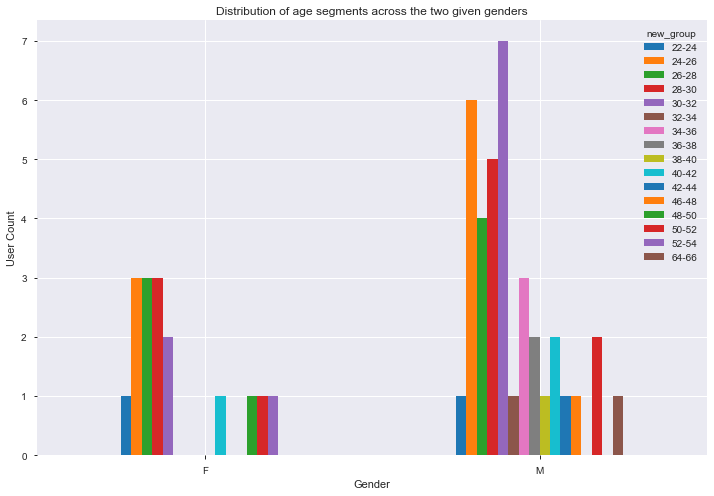

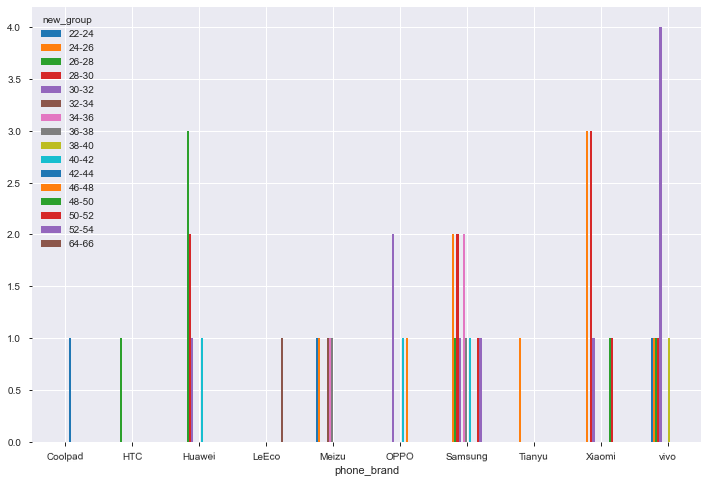

In [48]:
# Assessing Q7 from Week 3
dfq7 = dfm.drop_duplicates(subset = 'device_id', keep = 'first')[['gender','phone_brand','new_group']]
dfq7=dfq7[dfq7['gender'].notnull()]
dfq7['phone_brand'] = dfq7['phone_brand'].map(eng_names)

q7_cross1 = pd.crosstab(dfq7['gender'],dfq6['new_group'])
q7_fig1 = q7_cross1.plot.bar(rot=1,figsize=(12,8))
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.title('Distribution of age segments across the two given genders')
plt.show()

# There are so few users and so many age segments (both the given segments as well as the ones we made) 
# that no meaningful analysis can be made when creating a matrix of age segments and phone brands.
q7_cross2 = pd.crosstab(dfq6['phone_brand'],dfq5['new_group'])
#q7_cross2
q7_fig2 = q7_cross2.plot.bar(rot=1,figsize=(12,8))

**Observations**:

The Age Segment categories are too much to analyse.

---
**<h4>EDA 8:** Hourly distribution of Phone Calls.</h4>

---

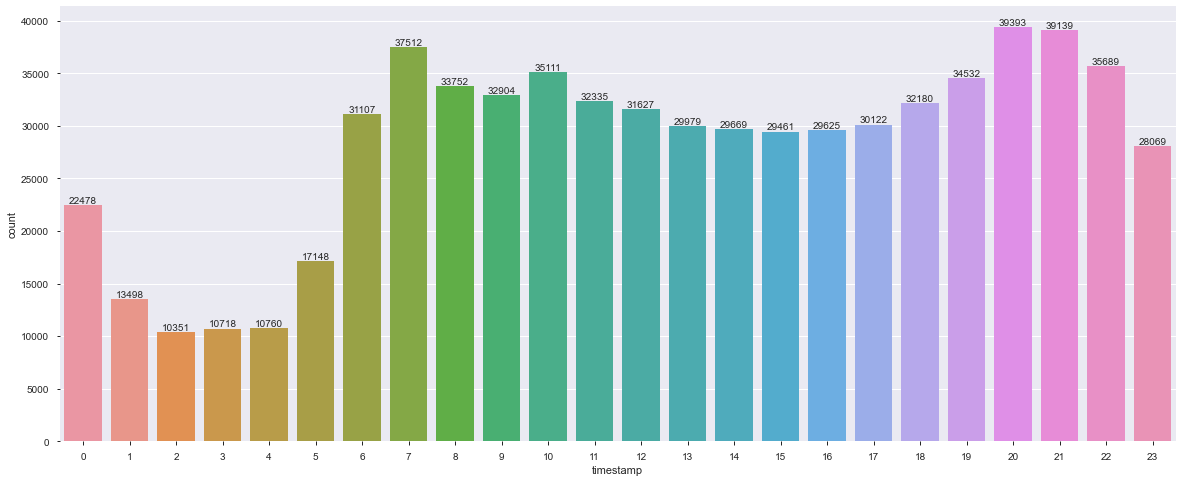

In [49]:
# Assessing Q8 from Week 3
# Converts the strings in the original database to a better format.
dfq8 = pd.to_datetime(dfm['timestamp'])
# Extracts the hours only
hours = dfq8.apply(lambda x : x.hour)
# Plots it all
plt.figure(figsize=(20,8))
q8_fig1 = sns.countplot(x = hours)
q8_fig1.bar_label(q8_fig1.containers[0])
plt.show()

**Observations**:

The users are most active between 7am to 11pm. In this duration, the user count is 400+ which is shooting to 500+ between 8pm-10pm. 12am - 5am are the least active hours

---
**<h4>Question 9:** Plot the Users on the Map using any suitable package.</h4>

---


In [50]:
# Assessing Q9 from Week 3

# This is pretty much done already in Q1.

**Observations**:

Plotted using Geopy. Most of the users are concentrated in western side of Maharastra

---
<a name = Section9></a>
# **9. Conclusion**
---

‘Team 1009’ concludes this project with the following succinct recommendations on marketing and branding efforts to its client
1.	Focus on Mumbai and Pune cities in Maharashtra.
2.	Preference across male and female genders for the brands of Samsung, Xiaomi, Vivo, Huawei, Meizu and Oppo.
3.	Emphasis towards the young adult population in the age group of 24-32 years.
4.	Concentration of 3 critical peak times of 7AM-8AM, 10AM-11AM and 8PM-10PM for its users to be able to serve advertisements towards offers and promotions.



In [51]:
output_db = dfm[['event_id','device_id','timestamp','latitude','longitude','state']]
output_db.to_csv('output.csv',index=False)